In [1]:
# Importar modulos a emplear
import pandas as pd
import matplotlib.pyplot as plt
import os

# Definir la ruta base y cargar los datos limpios
base_dir = os.getcwd()
procesados_dir = os.path.join(base_dir, "data", "procesados")

# Importamos el dato limpio

In [2]:
# Cargar los datos limpios
ventas_df = pd.read_csv(os.path.join(procesados_dir, "ventas_limpio.csv"))
productos_df = pd.read_csv(os.path.join(procesados_dir, "productos_limpio.csv"))
ciudad_df = pd.read_csv(os.path.join(procesados_dir, "ciudad_limpio.csv"))

# Union de tablas

In [3]:
# Unir las tablas
# Unir ventas con productos (por Cod_Producto)
ventas_productos = pd.merge(ventas_df, productos_df, on="cod_producto")

# Unir el resultado con ciudad (por Cod_Ciudad)
ventas_completa = pd.merge(ventas_productos, ciudad_df, on="cod_ciudad")

# Graficas

In [4]:
# Calcular ingresos, costos y beneficios
ventas_completa["Ingresos"] = ventas_completa["precio_unitario"] * ventas_completa["unidades_vendidas"]
ventas_completa["Costo_Total"] = (
    (ventas_completa["costo_unitario"] * ventas_completa["unidades_vendidas"])
    + ventas_completa["costo_asociado_al_domicilio"]
)
ventas_completa["Beneficio"] = ventas_completa["Ingresos"] - ventas_completa["Costo_Total"]

# Resumen total
resumen_total = ventas_completa[["Ingresos", "Costo_Total", "Beneficio"]].sum()
print("Resumen Total del Negocio:")
print(resumen_total)

Resumen Total del Negocio:
Ingresos       27635500.0
Costo_Total     5231050.0
Beneficio      22404450.0
dtype: float64


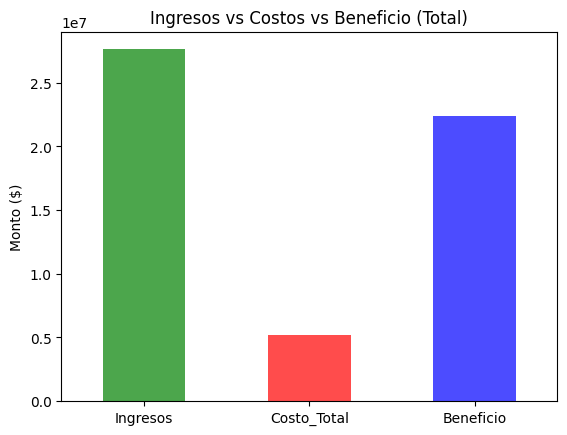

In [5]:
# Visualización 1: Comparación general
resumen_total.plot(kind="bar", color=["green", "red", "blue"], alpha=0.7)
plt.title("Ingresos vs Costos vs Beneficio (Total)")
plt.ylabel("Monto ($)")
plt.xticks(rotation=0)
plt.show()

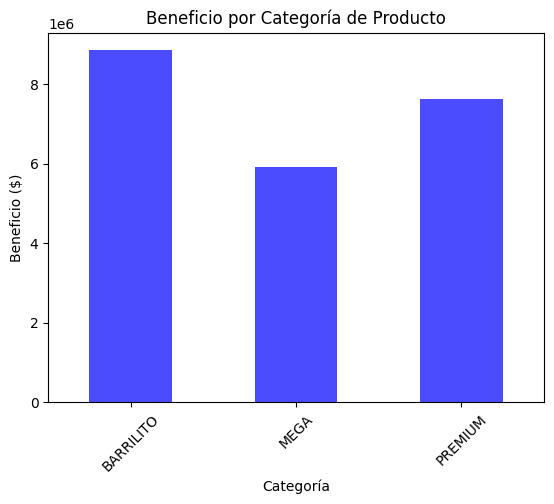

In [7]:
# Visualización 2: Beneficio por categoría de producto
beneficio_categoria = ventas_completa.groupby("categoria")["Beneficio"].sum()
beneficio_categoria.plot(kind="bar", color="blue", alpha=0.7)
plt.title("Beneficio por Categoría de Producto")
plt.ylabel("Beneficio ($)")
plt.xlabel("Categoría")
plt.xticks(rotation=45)
plt.show()